In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# %matplotlib inline
# from sklearn import linear_model

import re
from datetime import timedelta

In [35]:
hitches = [line.rstrip('\r\n') for line in open(r'C:\Users\syber\Desktop\THESIS\Hitches\THESIS-sandbox.csv')]
regex = re.compile(r'((?P<days>\d+?)d)?((?P<hours>\d+?)h)?((?P<minutes>\d+?)m)?((?P<seconds>\d+?)s) (?P<date>\d+?)?$')

def parse_time(time_str):
    parts = regex.match(time_str)
    if not parts:
        return
    parts = parts.groupdict()
    
    time_params = {}
    interval_params = ['days', 'hours', 'minutes', 'seconds']
    for (name) in (interval_params):
        time_params[name] = int(parts[name])
           
    return int(timedelta(**time_params).seconds), int(parts['date']) 

matrix = np.asmatrix(map(parse_time, hitches))
print matrix[3:7]

[[ 405 1806]
 [ 857 1806]
 [ 568 1806]
 [ 329 1806]]


In [37]:
months = np.unique(np.array(matrix[:,1]))
print type(months), type(months[0])
print months

<type 'numpy.ndarray'> <type 'numpy.int32'>
[1612 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710 1711 1712 1801 1802
 1803 1804 1805 1806]


In [41]:
arr = []
for date in months:
    hitches_for_month = np.squeeze(np.asarray(matrix[matrix[:,1] == date]))
    mean = np.mean(np.array(hitches_for_month).astype(np.int))
    arr.append([date, mean])
arr = np.asmatrix(arr)
print arr

[[  1612.          10525.90537634]
 [  1701.          13141.04709141]
 [  1702.          13297.0819209 ]
 [  1703.          11080.77393075]
 [  1704.          18445.36518047]
 [  1705.          19117.68502582]
 [  1706.          11118.12106538]
 [  1707.          10292.38632479]
 [  1708.           9569.40127389]
 [  1709.          11938.6880597 ]
 [  1710.           7060.9845679 ]
 [  1711.           4819.5399361 ]
 [  1712.           6421.59710495]
 [  1801.           2612.64821429]
 [  1802.           1780.90322581]
 [  1803.           4225.70588235]
 [  1804.           3431.44481054]
 [  1805.           3077.3776    ]
 [  1806.           3453.17      ]]


seaborn-darkgrid


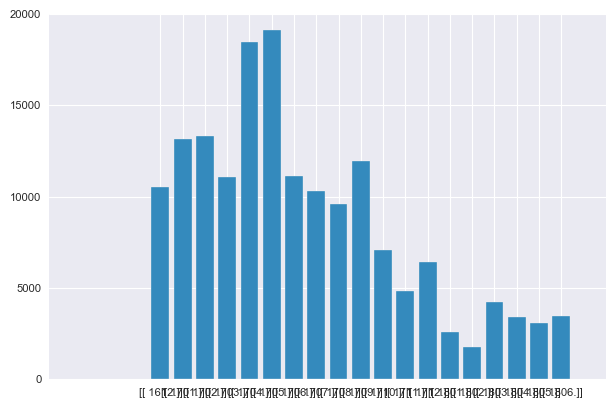

seaborn-notebook


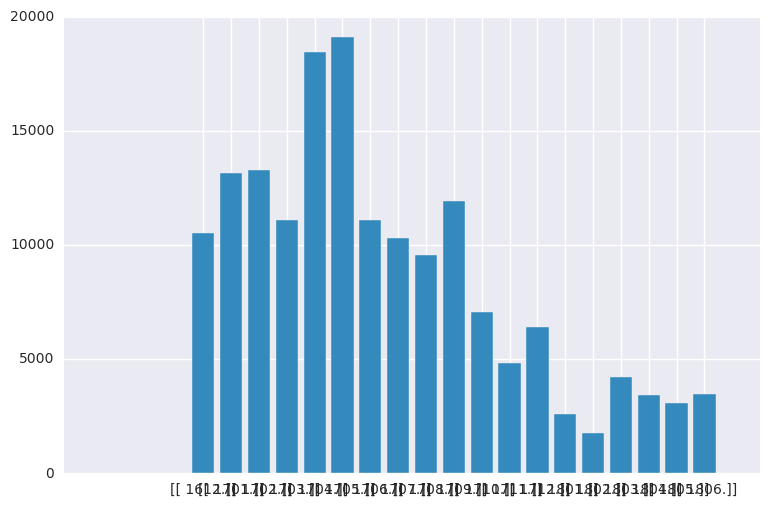

classic


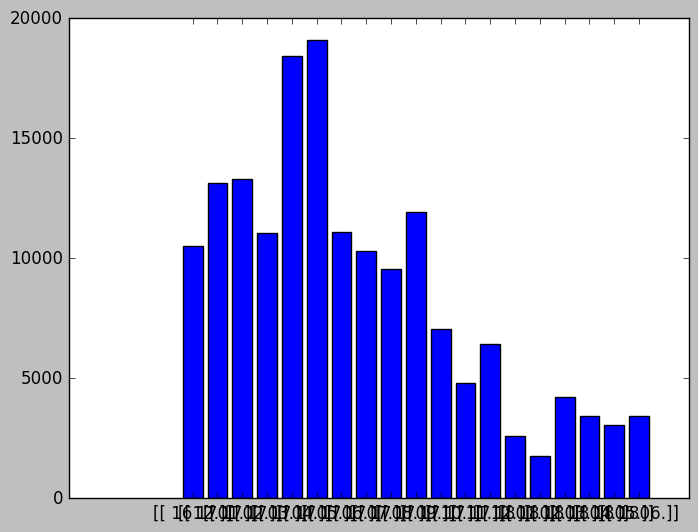

seaborn-ticks


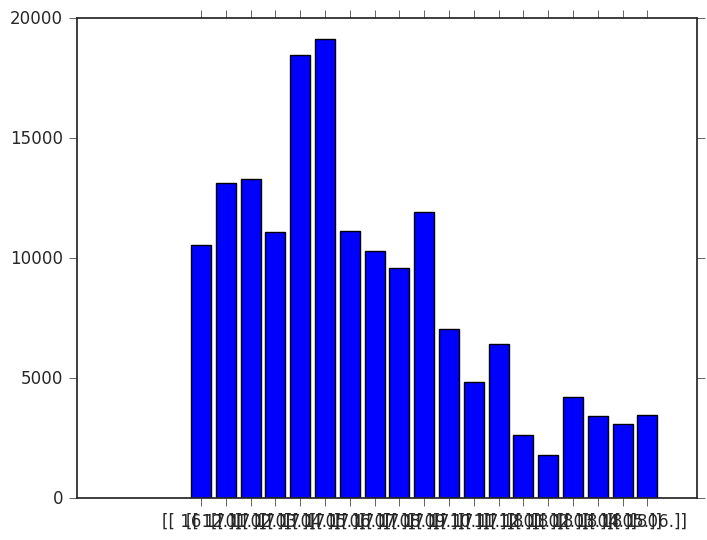

grayscale


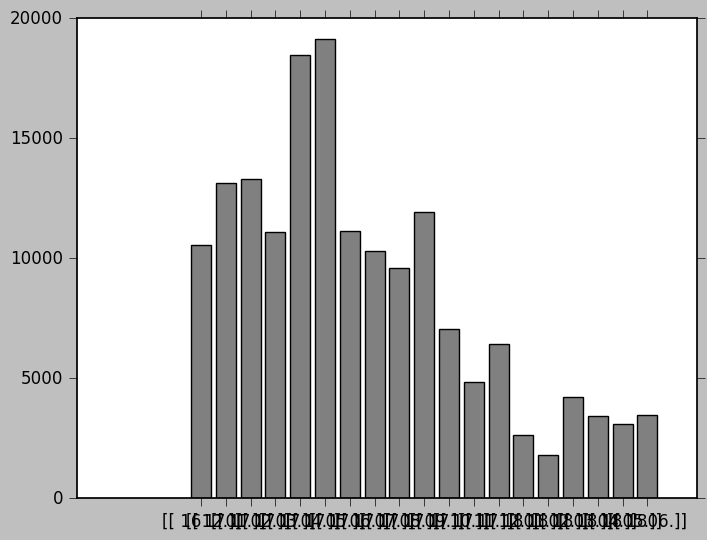

bmh


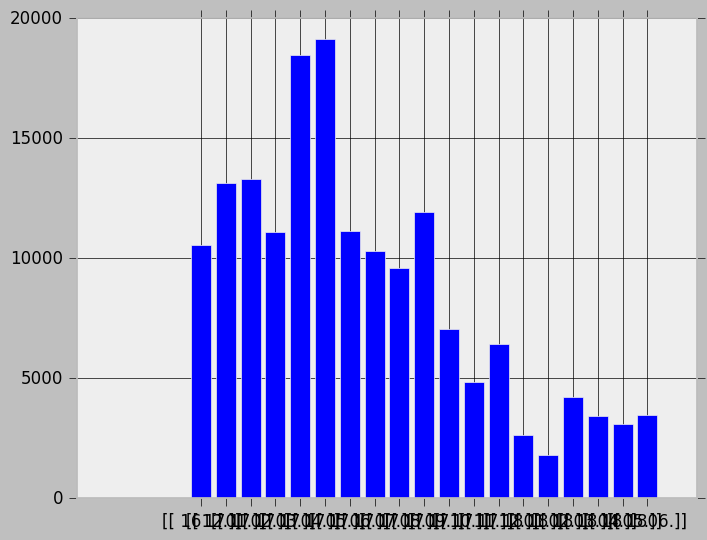

seaborn-talk


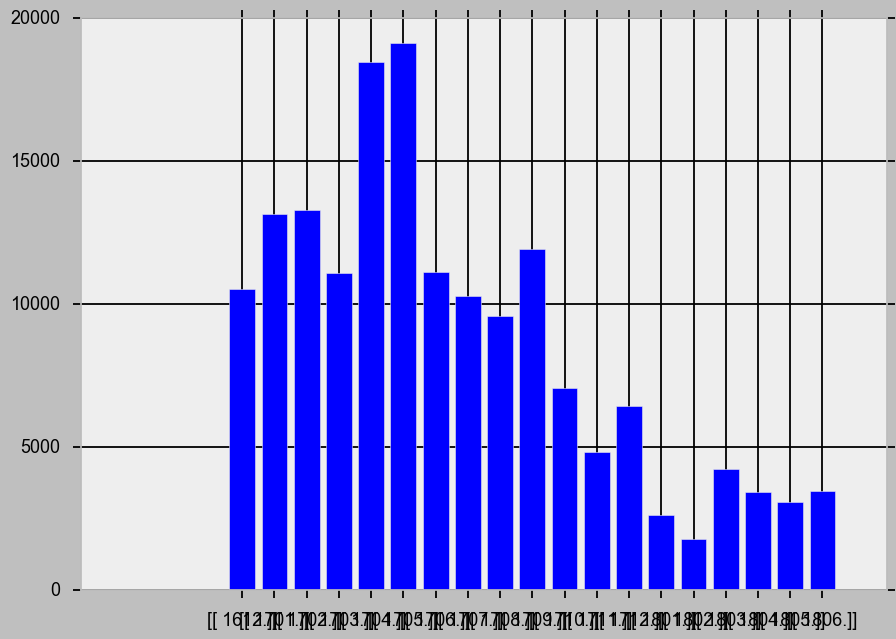

dark_background


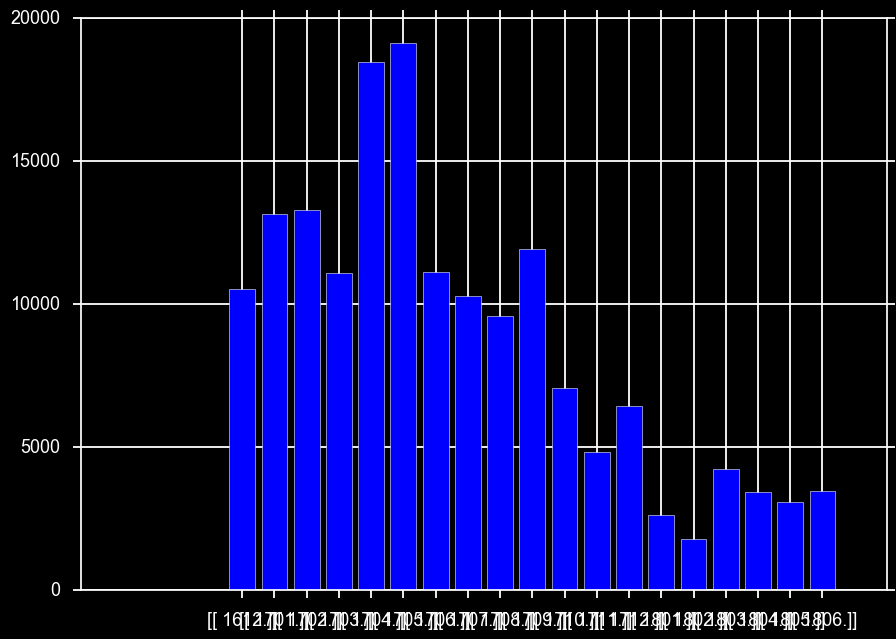

ggplot


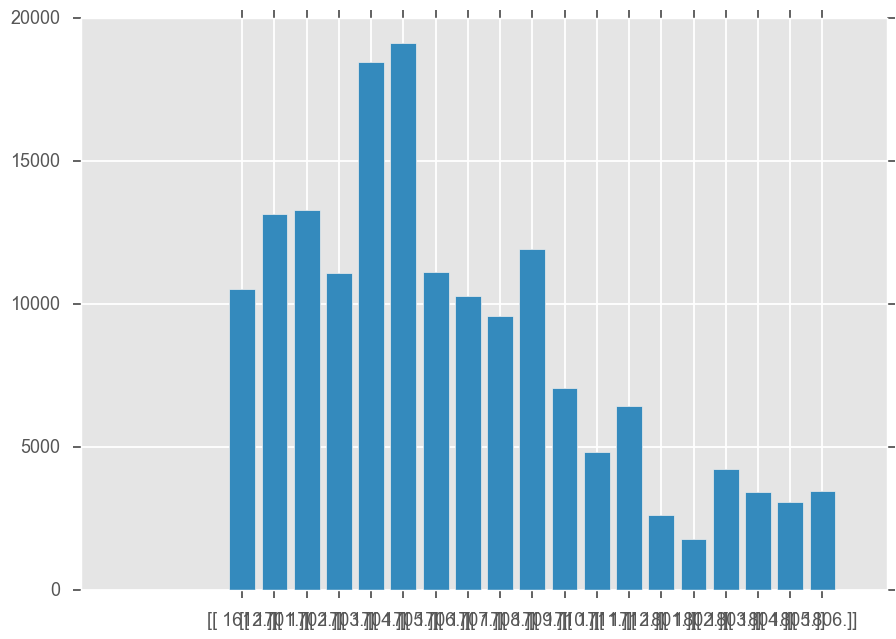

fivethirtyeight


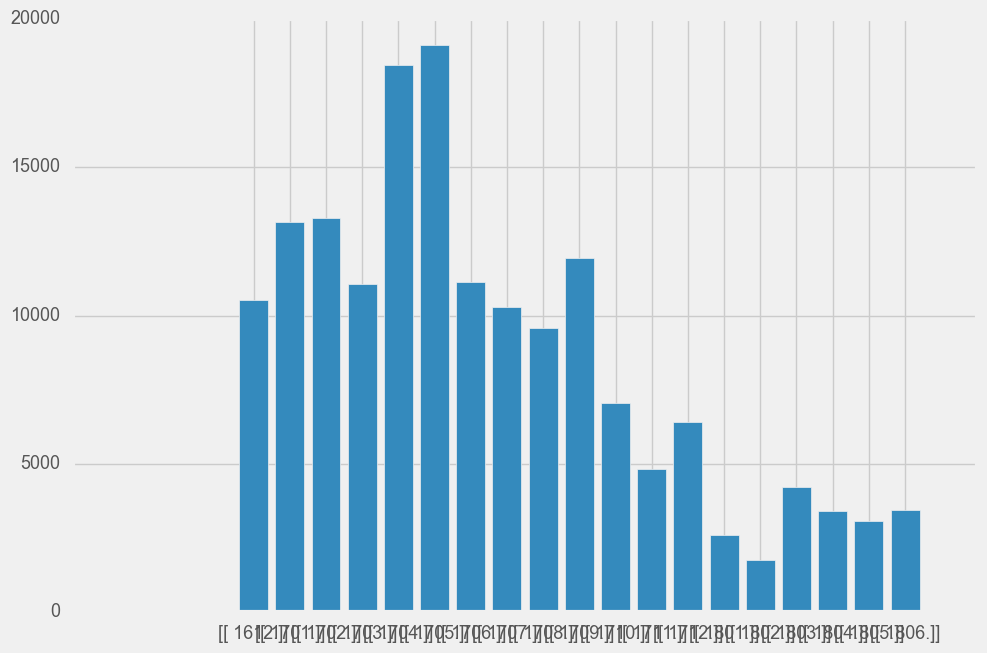

seaborn-colorblind


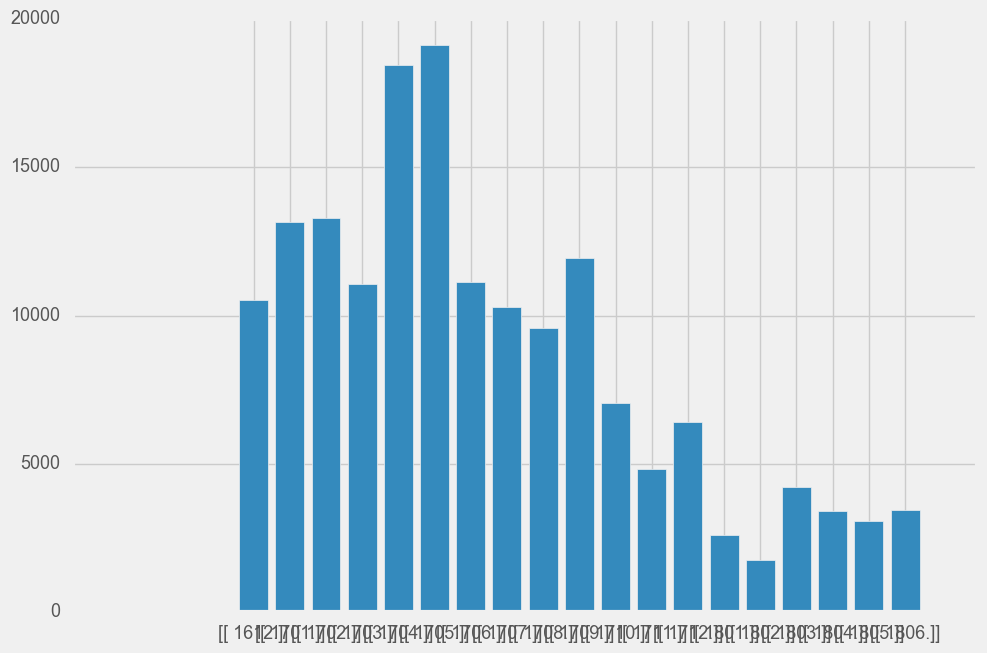

seaborn-deep


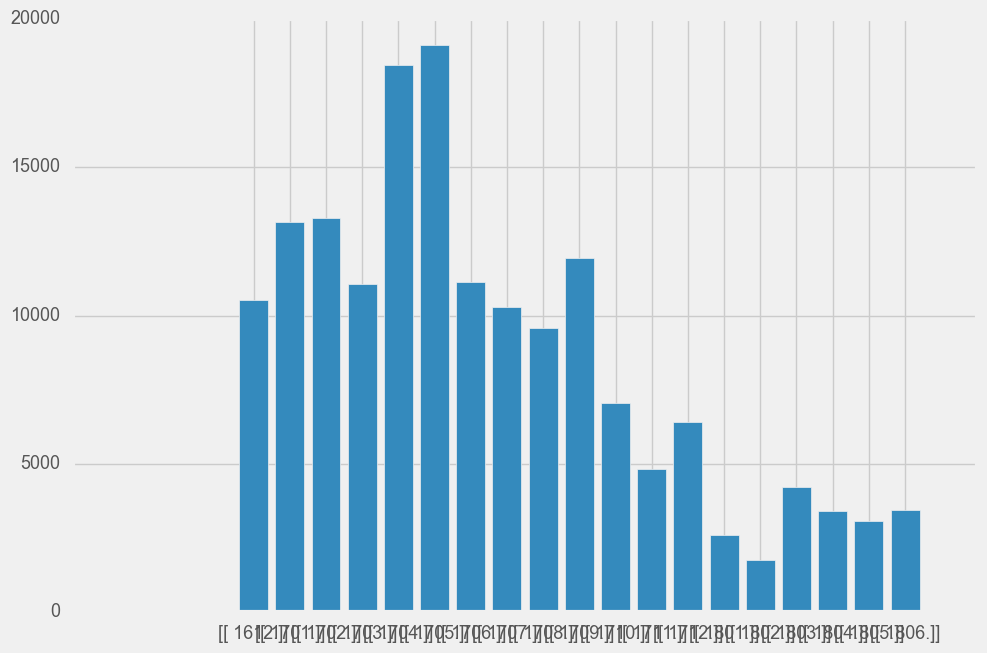

seaborn-whitegrid


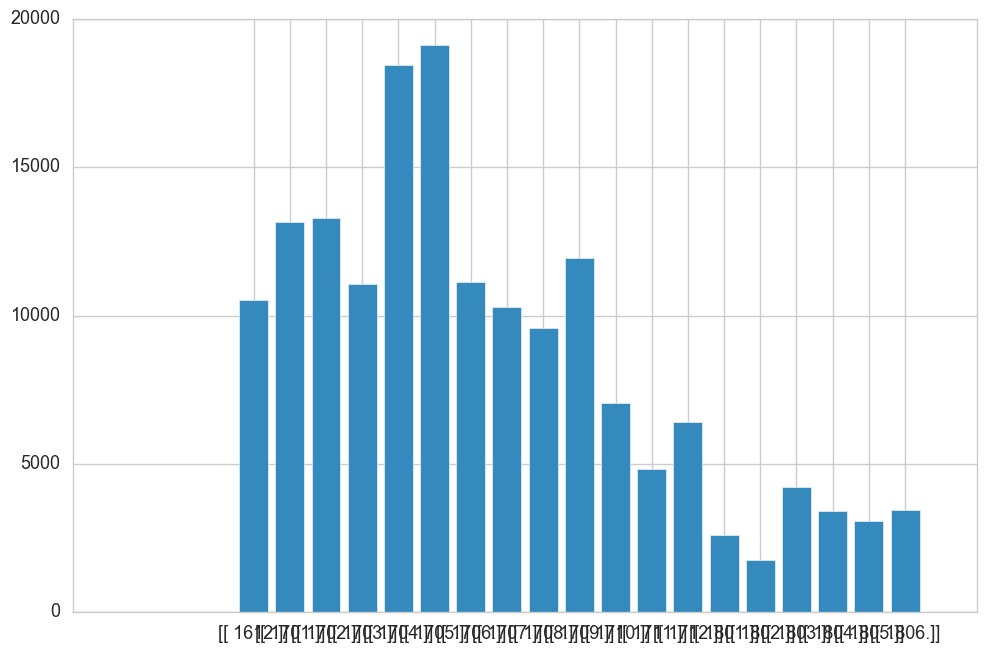

seaborn-bright


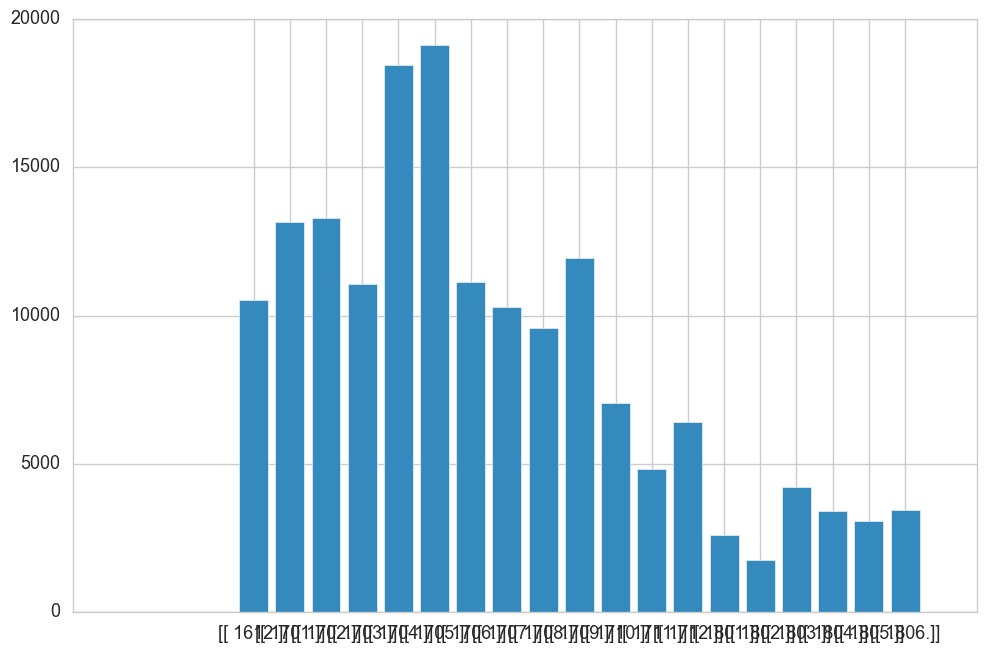

seaborn-poster


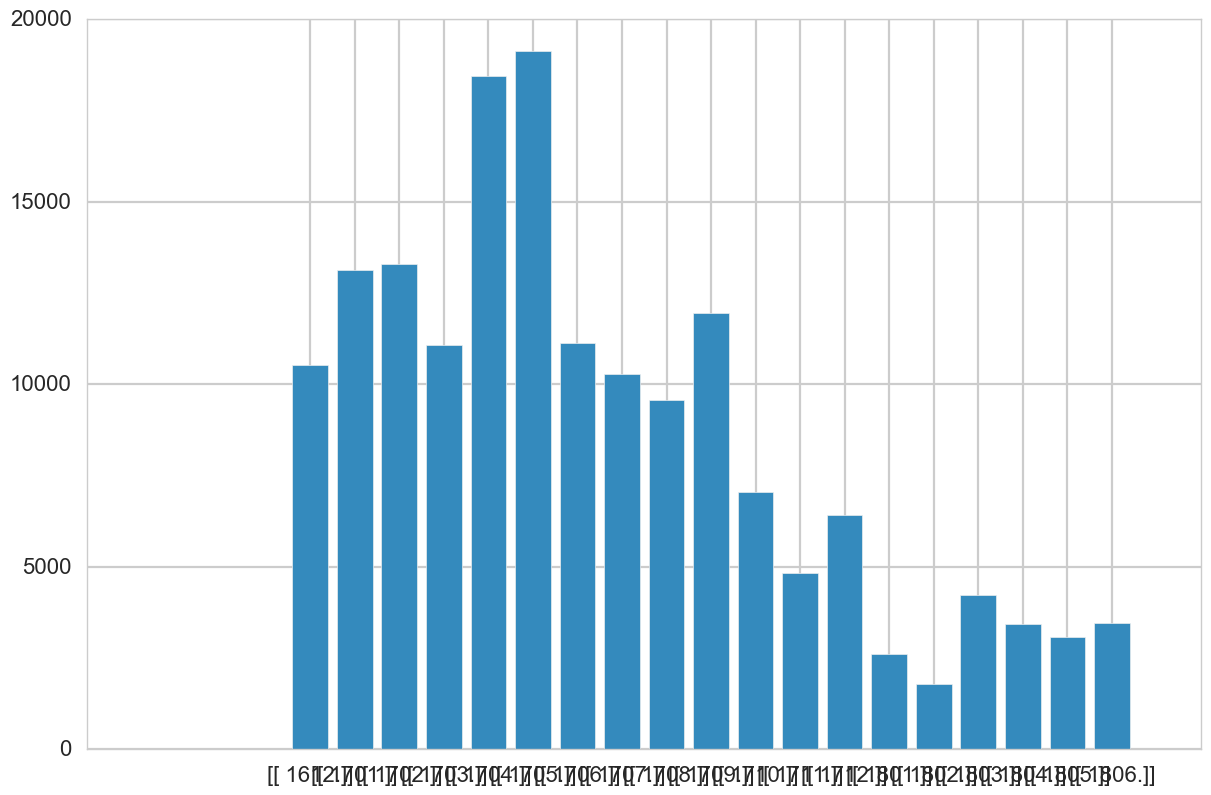

seaborn-muted


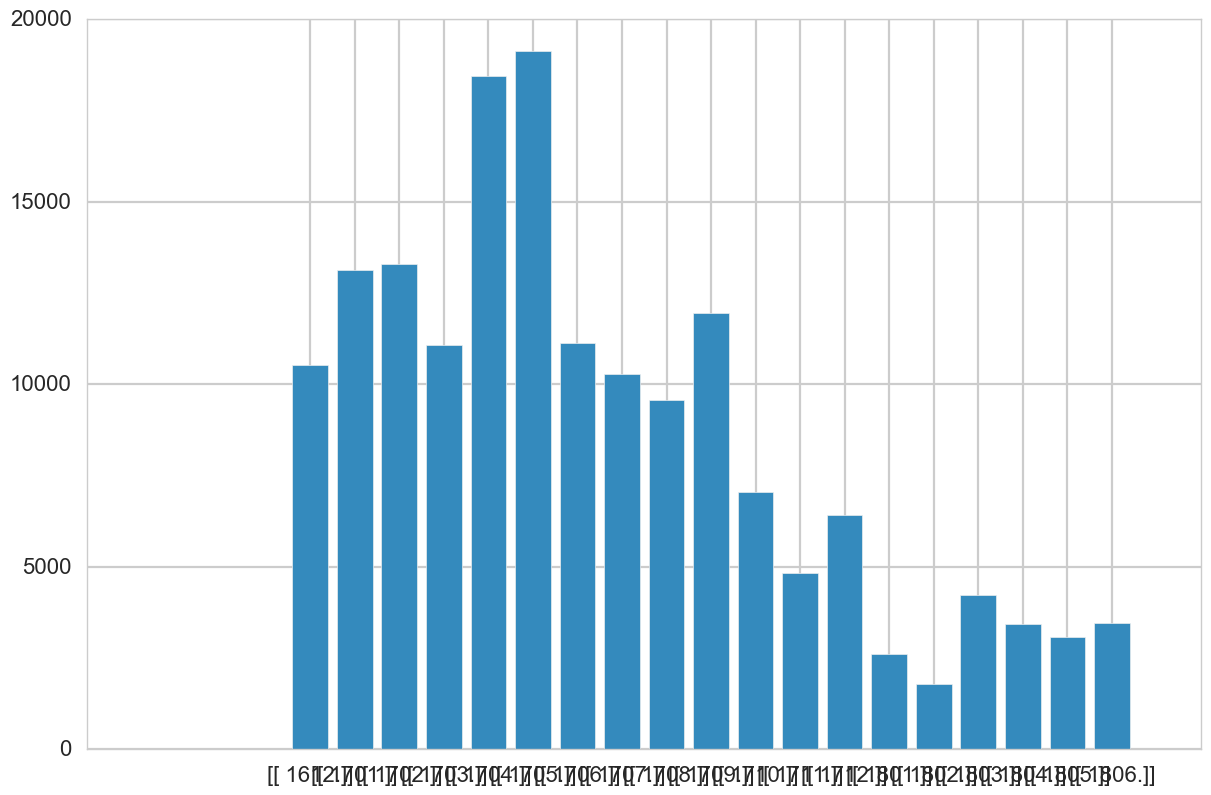

seaborn-paper


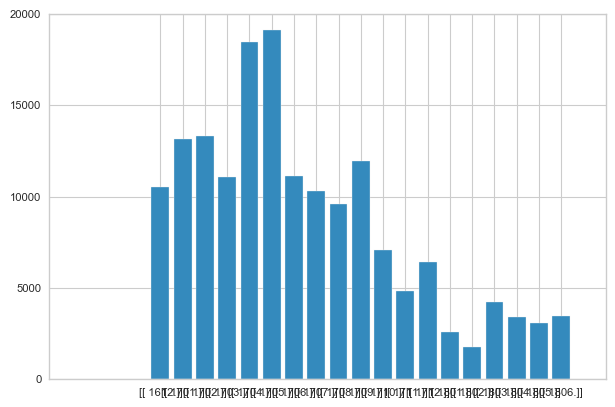

seaborn-white


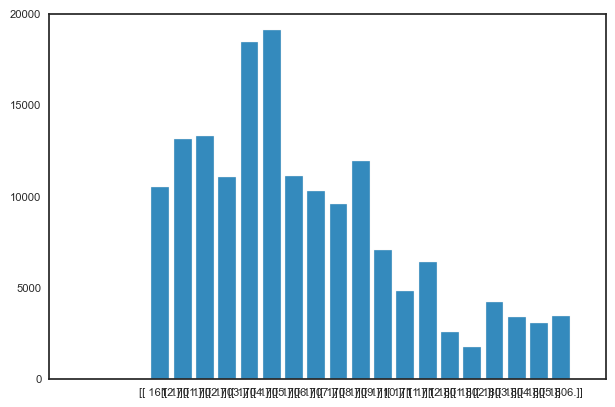

seaborn-pastel


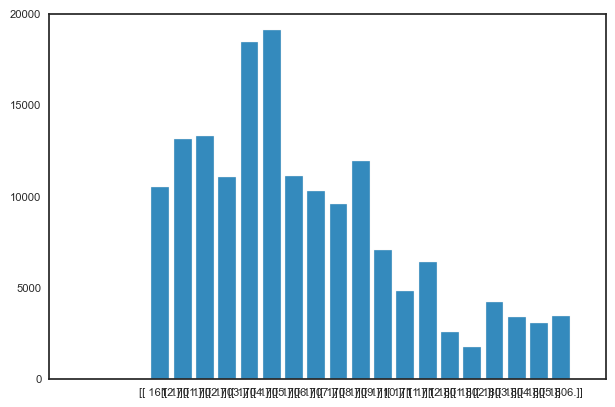

seaborn-dark


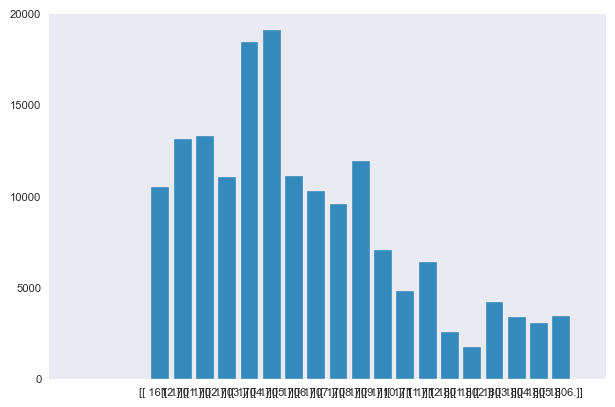

seaborn-dark-palette


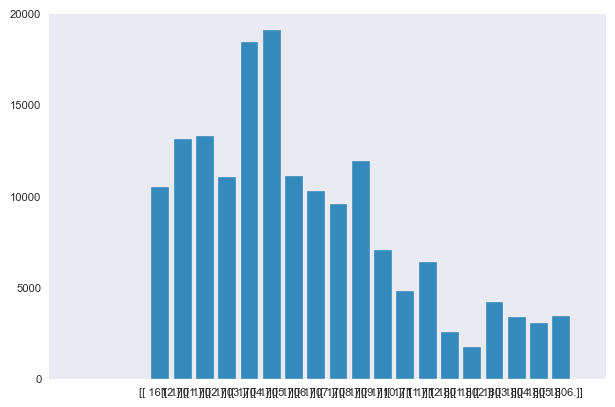

In [56]:
for style in plt.style.available:
    print style
    plt.style.use(style)
    plt.bar(range(len(arr)), arr[:,1], align='center')  # python 2.x
    plt.xticks(range(len(arr)), arr[:,0])
    plt.show()

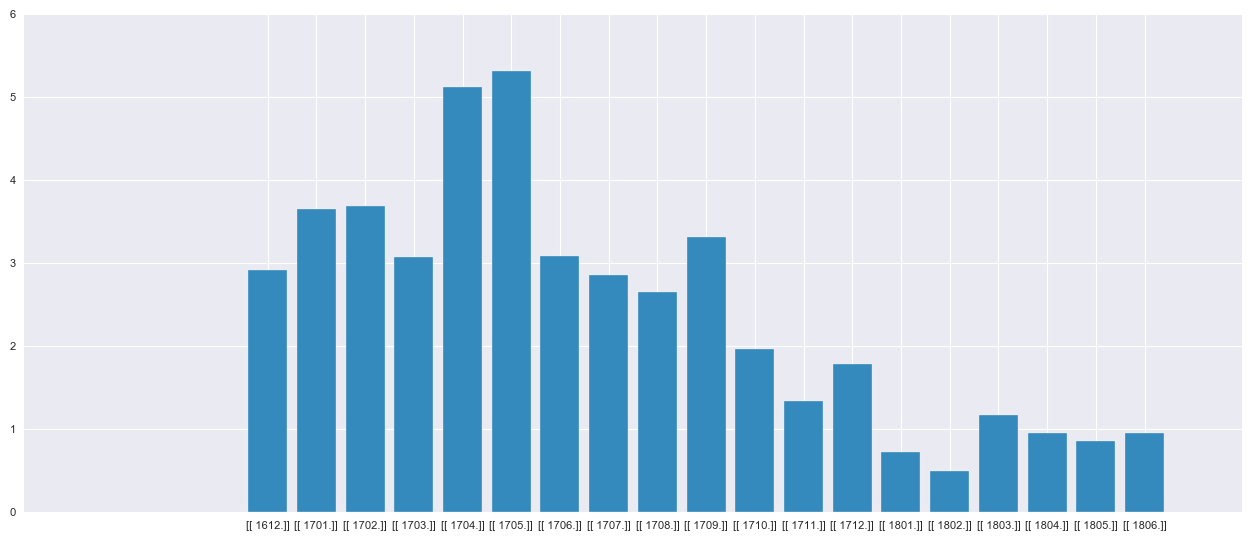

In [61]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14, 6))
plt.bar(range(len(arr)), arr[:,1]/3600.0, align='center')  # python 2.x
plt.xticks(range(len(arr)), arr[:,0])
plt.show()